## Brain Tumor Classification

A Brain tumor is considered as one of the aggressive diseases, among children and adults. Brain tumors account for 85 to 90 percent of all primary Central Nervous System(CNS) tumors. Every year, around 11,700 people are diagnosed with a brain tumor. The 5-year survival rate for people with a cancerous brain or CNS tumor is approximately 34 percent for men and36 percent for women. Brain Tumors are classified as: Benign Tumor, Malignant Tumor, Pituitary Tumor, etc. Proper treatment, planning, and accurate diagnostics should be implemented to improve the life expectancy of the patients. The best technique to detect brain tumors is Magnetic Resonance Imaging (MRI). A huge amount of image data is generated through the scans. These images are examined by the radiologist. A manual examination can be error-prone due to the level of complexities involved in brain tumors and their properties.

- A brain tumor is an abnormal growth of cells in the brain's tissues. Brain tumors can be benign (not cancer) or malignant (cancer). 

- Brain tumors occur when DNA changes in cells in or near the brain. These changes tell cells to grow quickly and continue living when healthy cells would die. Brain tumors can also develop when certain genes on a cell's chromosomes are damaged and no longer function properly. 

- Brain tumors can begin in the brain. These are called primary brain tumors. Sometimes, cancer spreads to the brain from other parts of the body. These tumors are secondary brain tumors, also called metastatic brain tumors.

- Brain tumors don't always cause symptoms. Symptoms depend on the tumor's location and size. Brain tumors can also make it hard for people to learn, plan, make decisions, and concentrate. 

- Benign brain tumors tend to be slow-growing brain tumors. Malignant brain tumors tend to be fast-growing brain tumors.

Application of automated classification techniques using Machine Learning(ML) and Artificial Intelligence(AI)has consistently shown higher accuracy than manual classification. Hence, proposing a system performing detection and classification by using Deep Learning Algorithms using ConvolutionNeural Network (CNN), Artificial Neural Network (ANN), and TransferLearning (TL) would be helpful to doctors all around the world.

**Context**
Brain Tumors are complex. There are a lot of abnormalities in the sizes and location of the brain tumor(s). This makes it really difficult for complete understanding of the nature of the tumor. Also, a professional Neurosurgeon is required for MRI analysis. Often times in developing countries the lack of skillful doctors and lack of knowledge about tumors makes it really challenging and time-consuming to generate reports from MRI’. So an automated system on Cloud can solve this problem.

[Dataset](https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri)

In [35]:
import tensorflow as tf
import cv2
from tensorflow.keras.layers import Input,Dense,Flatten,Lambda,Dropout,MaxPooling2D,BatchNormalization,Conv2D
from keras.models import Sequential, Model, load_model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, Callback
from tensorflow.keras.optimizers import Adagrad,SGD,Adam
from tensorflow.keras import regularizers
from tensorflow.keras.utils import img_to_array,load_img
import numpy as np
from glob import glob

In [2]:
IMAGE_SIZE = (224,224)
TENSOR_SIZE = (224,224,3)
train_path = 'brain_tumor_dataset/Training'
test_path  = 'brain_tumor_dataset/Testing'

In [3]:
vgg_model  = VGG16(input_tensor=Input(shape=TENSOR_SIZE),weights='imagenet',include_top=False)
resnet_model  = ResNet50(input_tensor=Input(shape=TENSOR_SIZE),weights='imagenet',include_top=False)

In [ ]:
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

: 

In [4]:
resnet_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [5]:
# Dont Train Existing Model
for layer in vgg_model.layers:
    layer.trainable = False

for layer in resnet_model.layers:
    layer.trainable = False

In [6]:
# Classes
folders = glob('brain_tumor_dataset/Training/*')

In [7]:
print('Total Classes: ',len(folders))

Total Classes:  4


In [8]:
vgg_based_model = Sequential()
vgg_based_model.add(vgg_model)
vgg_based_model.add(Flatten())
vgg_based_model.add(Dense(256,activation='relu'))
vgg_based_model.add(Dense(4,activation='softmax'))

In [9]:
vgg_based_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dense_1 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 21138500 (80.64 MB)
Trainable params: 6423812 (24.50 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [10]:
resnet_based_model = Sequential()
resnet_based_model.add(resnet_model)
resnet_based_model.add(Flatten())
resnet_based_model.add(Dense(256,activation='relu'))
resnet_based_model.add(Dense(4,activation='softmax'))

In [11]:
resnet_based_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 100352)            0         
                                                                 
 dense_2 (Dense)             (None, 256)               25690368  
                                                                 
 dense_3 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 49279108 (187.98 MB)
Trainable params: 25691396 (98.00 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [12]:
vgg_based_model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

resnet_based_model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [13]:
train_data_generator = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_data_generator = ImageDataGenerator(rescale=1./255)

In [14]:
%pwd

'c:\\Users\\arbas\\Documents\\Projects\\Machine-Learning\\EndToEnd_Deployed\\Brain_Tumor_Classification\\notebooks'

In [15]:
training_set = train_data_generator.flow_from_directory(train_path,target_size=IMAGE_SIZE,batch_size=32,class_mode='categorical')

Found 2870 images belonging to 4 classes.


In [16]:
testing_set = test_data_generator.flow_from_directory(test_path,target_size=IMAGE_SIZE,batch_size=32,class_mode='categorical')

Found 394 images belonging to 4 classes.


In [17]:
# device = tf.device('cuda:0' if tf.config.list_physical_devices('GPU') else 'cpu')
# print('Selected device:', device)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [18]:
v_model = vgg_based_model.fit(
    training_set,
    validation_data=testing_set,
    epochs=10,
    steps_per_epoch=len(training_set),
    validation_steps=len(testing_set)
)

r_model = resnet_based_model.fit(
    training_set,
    validation_data=testing_set,
    epochs=10,
    steps_per_epoch=len(training_set),
    validation_steps=len(testing_set)
)

Epoch 1/10


90/90 [==============================] - 602s 7s/step - loss: 1.2074 - accuracy: 0.6714 - val_loss: 1.6401 - val_accuracy: 0.5330
Epoch 2/10
90/90 [==============================] - 574s 6s/step - loss: 0.4200 - accuracy: 0.8411 - val_loss: 1.8156 - val_accuracy: 0.6624
Epoch 3/10
90/90 [==============================] - 603s 7s/step - loss: 0.3142 - accuracy: 0.8847 - val_loss: 1.6135 - val_accuracy: 0.6929
Epoch 4/10
90/90 [==============================] - 499s 6s/step - loss: 0.3182 - accuracy: 0.8808 - val_loss: 1.4612 - val_accuracy: 0.6523
Epoch 5/10
90/90 [==============================] - 510s 6s/step - loss: 0.2557 - accuracy: 0.9017 - val_loss: 1.5758 - val_accuracy: 0.7462
Epoch 6/10
90/90 [==============================] - 450s 5s/step - loss: 0.2538 - accuracy: 0.9028 - val_loss: 2.0598 - val_accuracy: 0.6878
Epoch 7/10
90/90 [==============================] - 404s 4s/step - loss: 0.2090 - accuracy: 0.9216 - val_loss: 1.9002 - val_accuracy: 0.7259
Epoch 8/10


In [20]:
vgg_based_model.save('vgg_based_model.h5')
resnet_based_model.save('resnet_based_model.h5')

c:\Users\arbas\Documents\Projects\Machine-Learning\EndToEnd_Deployed\Brain_Tumor_Classification\brain_tumor\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


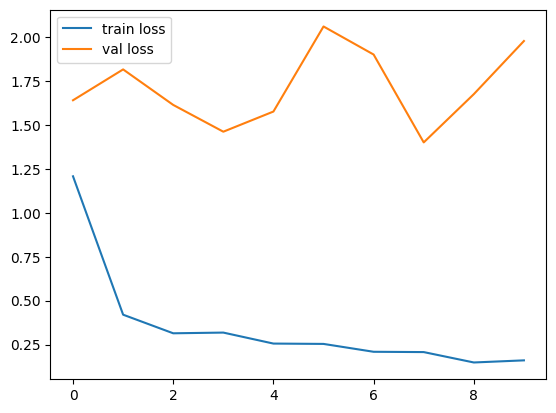

<Figure size 640x480 with 0 Axes>

In [24]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(v_model.history['loss'], label='train loss')
plt.plot(v_model.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('VGG_LossVal_loss')

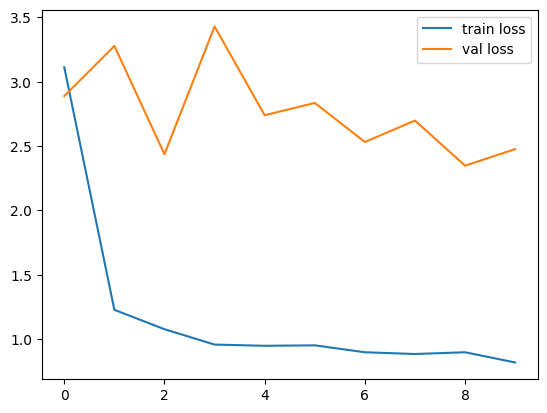

<Figure size 640x480 with 0 Axes>

In [25]:
plt.plot(r_model.history['loss'], label='train loss')
plt.plot(r_model.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('RESNET_LossVal_loss')

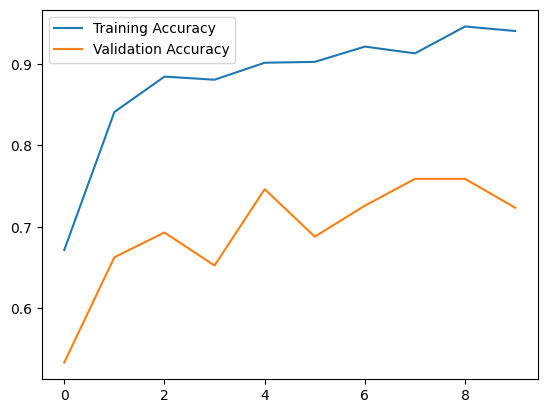

<Figure size 640x480 with 0 Axes>

In [26]:
plt.plot(v_model.history['accuracy'],label='Training Accuracy')
plt.plot(v_model.history['val_accuracy'],label='Validation Accuracy')
plt.legend()
plt.show()
plt.savefig('VGG_AccVal_acc')

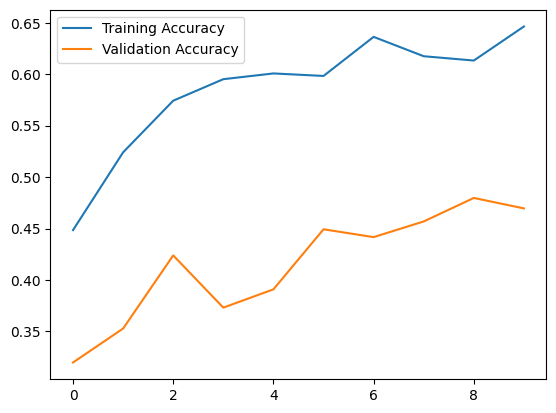

<Figure size 640x480 with 0 Axes>

In [27]:
plt.plot(r_model.history['accuracy'],label='Training Accuracy')
plt.plot(r_model.history['val_accuracy'],label='Validation Accuracy')
plt.legend()
plt.show()
plt.savefig('RESNET_AccVal_acc')

In [30]:
preds_resnet = resnet_based_model.predict(testing_set)
preds_vgg = vgg_based_model.predict(testing_set)

13/13 [==============================] - 48s 4s/step


In [33]:
result_resnet = np.argmax(preds_resnet, axis=1)
result_resnet

array([1, 3, 1, 2, 1, 2, 2, 1, 2, 3, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 2, 2, 3, 2, 2, 1, 1, 1, 2, 1, 1, 3, 2, 0, 1, 1, 1, 1, 2, 2, 3,
       2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 3, 2, 1, 1, 2, 1, 2,
       2, 2, 3, 2, 2, 2, 1, 2, 2, 1, 0, 3, 2, 3, 1, 2, 1, 1, 1, 2, 1, 2,
       2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 0, 1, 2, 2, 2, 1, 2, 3, 2,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 3, 1, 2, 1, 2, 1, 2, 3,
       1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       1, 2, 1, 2, 1, 3, 2, 1, 2, 1, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3,
       1, 2, 2, 3, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 3, 2, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 3, 3, 1, 2, 2, 2,
       1, 3, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 3, 1, 0, 2, 2, 3,
       2, 1, 1, 2, 1, 1, 2, 0, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 0, 2,
       2, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1,
       1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2,

In [34]:
result_vgg = np.argmax(preds_vgg,axis=1)
result_vgg

array([1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 3, 1, 2, 1, 2, 1, 1, 3, 1, 3,
       2, 3, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 3, 1, 1, 1, 1, 2, 1, 3, 2,
       1, 1, 1, 2, 3, 2, 2, 1, 1, 2, 1, 3, 2, 3, 1, 3, 3, 2, 1, 1, 1, 2,
       1, 1, 1, 3, 0, 0, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 0, 2, 1,
       2, 1, 2, 2, 1, 1, 1, 3, 2, 1, 3, 2, 2, 1, 1, 2, 3, 2, 2, 3, 3, 2,
       1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 0, 2, 2, 2, 1, 2, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 3, 1, 1, 2, 2, 1, 3, 3, 1, 2, 2,
       1, 2, 3, 1, 1, 3, 2, 2, 1, 1, 2, 1, 1, 2, 0, 1, 1, 0, 2, 1, 2, 2,
       1, 3, 3, 2, 1, 3, 1, 1, 1, 1, 1, 2, 1, 2, 2, 3, 3, 2, 3, 2, 2, 2,
       1, 1, 2, 3, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 3, 1,
       2, 1, 2, 3, 2, 2, 1, 3, 2, 2, 1, 0, 3, 1, 2, 1, 1, 1, 1, 3, 1, 2,
       2, 1, 1, 2, 0, 3, 1, 2, 2, 1, 1, 1, 0, 3, 2, 1, 1, 3, 2, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 3, 1, 0, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2,
       3, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 0,